* # Box-Plots: Finding Outliers

This notebook presents a quick way of finding the values of all outliers appearing in box-plots.

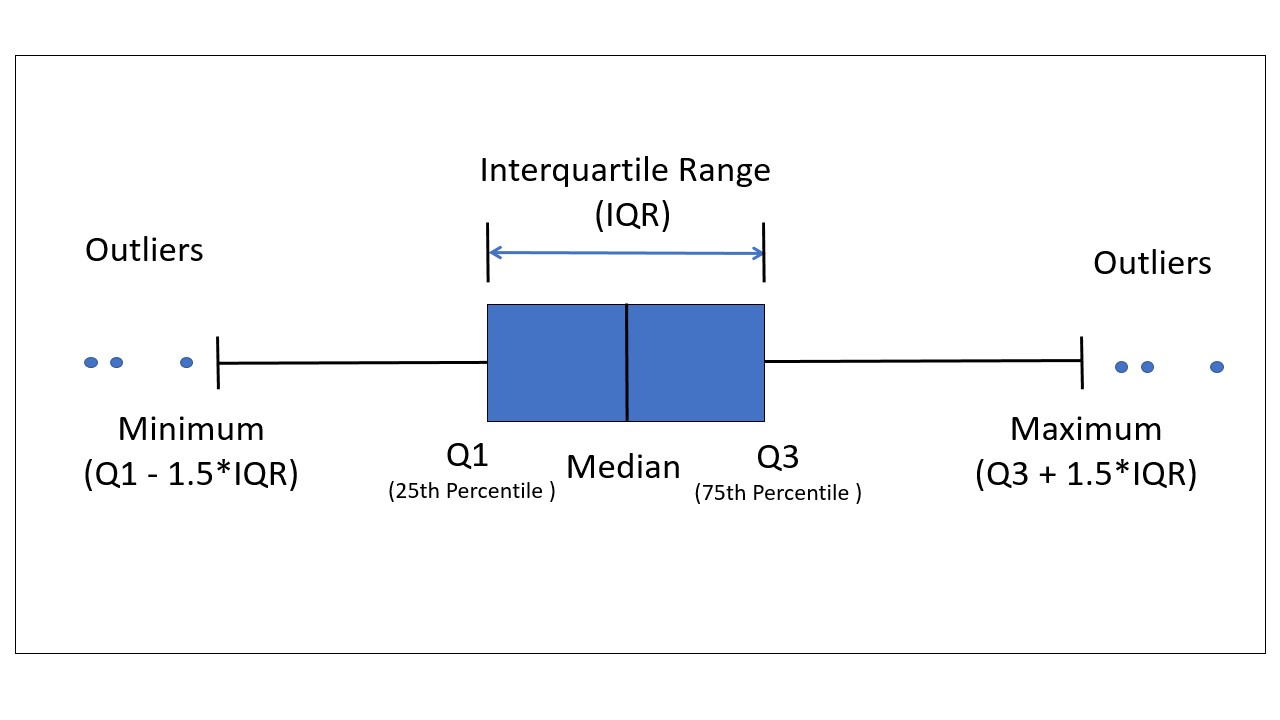

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
tips = sns.load_dataset("tips")

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


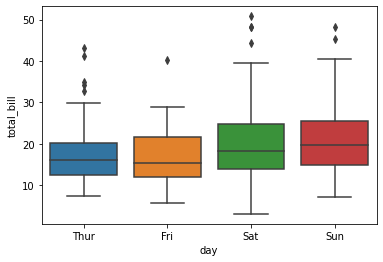

In [4]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)

In [5]:
def box_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    mask = (series < Q1 - 1.5 * IQR) | (series > Q3 + 1.5 * IQR)
    series = series[mask]
    return series

In [6]:
data_outliers = pd.DataFrame([])

In [7]:
for i in tips.copy().day.unique():
    df_outlier = tips.copy().sort_values(['day'])
    df_outlier = df_outlier.loc[df_outlier['day'] == i, :].reset_index(drop=True)
    df_outlier = df_outlier[['day', 'total_bill']].set_index('day').apply(box_outliers)
    df_outlier = df_outlier.reset_index()
    data_outliers = data_outliers.append(df_outlier) 

In [8]:
data_outliers.reset_index(drop=True)

,day,total_bill
0,Sun,45.35
1,Sun,48.17
2,Sat,50.81
3,Sat,48.33
4,Sat,48.27
5,Sat,44.30
6,Thur,34.83
7,Thur,32.68
8,Thur,43.11
9,Thur,41.19


Check the above box-plot, these are actually the outlier values!